# EECS 298b ML for Signal Processing
# Lecture 1: Introduction to Python, Pandas, and Tensorflow/Keras

# Initialization and loading data
These are the basic steps at the start of any project

In [ ]:
#this is called "magic". It is not really necessary, but good because someday there will be tensorflow3
%tensorflow_version 2.x

In [ ]:
#You will use these basic imports for everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf

You have to "run" each code segment in the jupyter notebook if you need the result for segments farther down.  You can click the little arrow that appears in the brackets at the top of each segment, or you can use ctrl-return (or shift-return, which runs the segment and moves to the next one).  The "Runtime" menu at the top of the notebook has all this too.

In [ ]:
#Useful for this example
from matplotlib.dates import DateFormatter

The difference between a **sequence** and a **timeseries** is whether there is a time label for each point.  For example, a sequence could be "anteater, bird, cat, dog, elephant".  There is no time associated to each, although there is an order.  Sequences are important for natural language processing (NLP), but that is not what this course is about.  We are going to discuss timeseries, which generally means that the data are linked to time.  Typically, this is a function of the form $x(t)$, where $x$ is the data, and each item of data occurs at a particular time $t$.  While we can think of $x$ as a function of $t$ (how I just wrote it) or as a mapping from time to data $t \rightarrow x$, we can also think of it (if time is measured in descrete units) as a set of pairs $(t,x)$, which is in fact how it will usually occur within the computer.  Sometimes, time is implicit, in the sense that I can give you a sequence of numbers 1,1,2,3,5,8 and we could use the integer position of each number as if they all had arrived at 1 second intervals, so that in this case $x(3)=2$ and $x(6)=8$.  This is all more complicated than it needs to be, but I think it is helpful to realize that even when time seems not to be an important variable, it is always there somehow.

In [ ]:
#Here is an example (copied from online somewhere) of using explicit time values. Pandas has functions for this.
rng=pd.date_range('2021-03-24','2021-09-01',freq='D')  #freq='D' means each step is one day
ts = pd.Series(np.random.randn(len(rng)),index=rng)  #a pandas Series is not the same as an Array or a DataFrame
ts

2021-03-24    0.732530
2021-03-25    1.284554
2021-03-26    0.074942
2021-03-27    0.859141
2021-03-28   -0.515207
                ...   
2021-08-28   -0.868886
2021-08-29   -0.758386
2021-08-30    1.314721
2021-08-31    1.365562
2021-09-01   -0.253370
Freq: D, Length: 162, dtype: float64

In [ ]:
#turn the series into a pandas dataframe
df = pd.DataFrame({'date':rng,'val':ts})
df

,date,val
2021-03-24,2021-03-24,0.732530
2021-03-25,2021-03-25,1.284554
2021-03-26,2021-03-26,0.074942
2021-03-27,2021-03-27,0.859141
2021-03-28,2021-03-28,-0.515207
...,...,...
2021-08-28,2021-08-28,-0.868886
2021-08-29,2021-08-29,-0.758386
2021-08-30,2021-08-30,1.314721
2021-08-31,2021-08-31,1.365562


Note that the rows of the dataframe in this case are labeled by the timestamp, but the timestamp is also duplicated under the "date" column.  This is ok.  The row names in a dataframe are not actually data. You can leave them out if you want. But if you want to use the timestamps in a calculation, you need to make sure they are in one of the data columns.

Now let's read some real (non-random data).  The following code is also copied from somewhere online.

The source file (comma-separated values CSV) looks like:

```
Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
London,1700,142.8571429,259.7402597
London,1701,144.2857143,262.3376623
London,1702,145.7142857,264.9350649
London,1703,147.1428571,267.5324675
London,1704,148.5714286,270.1298701
```

In [ ]:
#load csv file into a pandas dataframe
pollution = pd.read_csv(
'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv' )
#column names are too long to be useful, so we can change them
pollution = pollution.rename(
columns={
'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))' : 'SPM' ,
'Smoke (Fouquet and DPCC (2011))' : 'Smoke' ,
'Entity' : 'City' }
)
#look at the dataframe; by default shows the first and last lines of the table
#  this table is only partial data; there is no useful data for Delhi.
pollution


,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [ ]:
#can explore this here, although it's always worthwhile to just open the data in excel or numbers or something
pollution.City.unique()


array(['Delhi', 'London'], dtype=object)

In [ ]:
#basic descriptive statistics.  Note that it does not understand that Year is a date value
#  they apparently have pollution data going back to 1700 in London
pollution.describe()

,Year,Smoke,SPM
count,331.000000,301.000000,331.000000
mean,1864.154079,210.296440,365.970050
std,94.366037,88.543288,172.512674
min,1700.000000,13.750000,15.000000
25%,1782.500000,168.571429,288.474026
50%,1865.000000,208.214286,375.324675
75%,1947.500000,291.818182,512.609209
max,2016.000000,342.857143,623.376623


Here is an example of basic plotting.  Also note that you can index columns of a dataframe using their name, which is why it is a good idea to rename columns to short simple things.

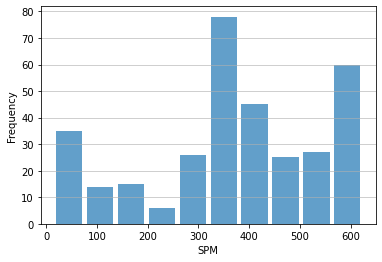

In [ ]:
n, bins, patches = plt.hist(x=pollution[ 'SPM' ], bins= 'auto' ,alpha= 0.7 , rwidth= 0.85 )
plt.grid(axis= 'y' , alpha= 0.75 )
plt.xlabel( 'SPM' )
plt.ylabel( 'Frequency' );  #just like matlab, semicolon prevents output from being displayed

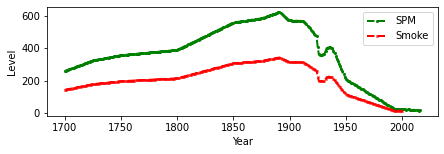

In [ ]:
London_index = pollution['City']=='London'  #select only the london data
#the following are equivalent:
#plt.plot(pollution[London_index]['Year'],pollution[London_index]['SPM'])  #explicit plt.plot(x,y)
#plt.plot('Year','SPM',data = pollution[London_index])   #plot.plot(column1, column2, data = fromdatasource)
#pollution[London_index].plot('Year','SPM')    #pandas makes plot a method of the dataframe
#how to make it fancy
axes = plt.gca()  #you need this to make all the plots overlay on the same graph
pollution[London_index].plot('Year','SPM',color='green', marker='o', linestyle='dashed',
      linewidth=2, markersize=2,figsize=( 7 , 2 ),ax = axes)
pollution[London_index].plot('Year','Smoke',color='red', marker='x', linestyle='dashed',
      linewidth=2, markersize=2,figsize=( 7 , 2 ),ax=axes)
plt.ylabel('Level')
plt.show()

# EEG Data Analysis
load the data (117 seconds of EEG) and create timeseries

This is from the OpenML.org online library.  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.  The features correspond to 14 EEG measurements from the headset, originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order.

Here is a sample of the file.  Note that the eye states are actually '1' and '2', not '1' and '0' as claimed in the openML documentation:

```
"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","Class"
4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.9,4393.85,1
4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.1,1
4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
4328.72,4011.79,4296.41,4155.9,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.9,4627.69,4210.77,4244.1,4212.82,4288.21,4632.82,4398.46,1
4321.03,4004.62,4284.1,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,1
```


In [ ]:
from sklearn.datasets import fetch_openml
eeg = fetch_openml(data_id=1471,as_frame= True )
#this timeseries dataset does not actually include time.  So we will synthesize timestamps
increment = 117 / len (eeg[ 'data' ])
index = np.linspace(
start= 0 ,
stop=increment* len (eeg[ 'data' ]),
num= len (eeg[ 'data' ])
)
ts_index = pd.to_datetime(index, unit= 's' ,origin = '2022-1-3 15:30:00')  #convert to seconds
#note that all dates start at january 1, 1970, unless you specify a different origin
v1 = pd.Series(name= 'V1' , data=eeg[ 'data' ][ 'V1' ].values, index=ts_index)  #turns the dataframe into a Series
v1

2022-01-03 15:30:00.000000000    4329.23
2022-01-03 15:30:00.007810831    4324.62
2022-01-03 15:30:00.015621901    4327.69
2022-01-03 15:30:00.023432732    4328.72
2022-01-03 15:30:00.031243801    4326.15
                                  ...   
2022-01-03 15:31:56.968756199    4281.03
2022-01-03 15:31:56.976567268    4276.92
2022-01-03 15:31:56.984378099    4277.44
2022-01-03 15:31:56.992189169    4284.62
2022-01-03 15:31:57.000000000    4287.69
Name: V1, Length: 14980, dtype: float64

In [ ]:
# there is an artifact at 1:10, so select a slice of time before
slicing = (v1.index >= '2022-1-3 15:30:08' ) & (v1.index <= '2022-1-3 15:31:10.000000000' )
#the result is still a pandas series, with timestamp, value pairs.
v1[slicing]

2022-01-03 15:30:08.006208658    4289.74
2022-01-03 15:30:08.014019728    4284.10
2022-01-03 15:30:08.021830559    4280.00
2022-01-03 15:30:08.029641390    4289.74
2022-01-03 15:30:08.037452459    4298.46
                                  ...   
2022-01-03 15:31:09.962547541    4289.74
2022-01-03 15:31:09.970358610    4283.08
2022-01-03 15:31:09.978169441    4284.62
2022-01-03 15:31:09.985980272    4289.23
2022-01-03 15:31:09.993791342    4290.77
Name: V1, Length: 7937, dtype: float64

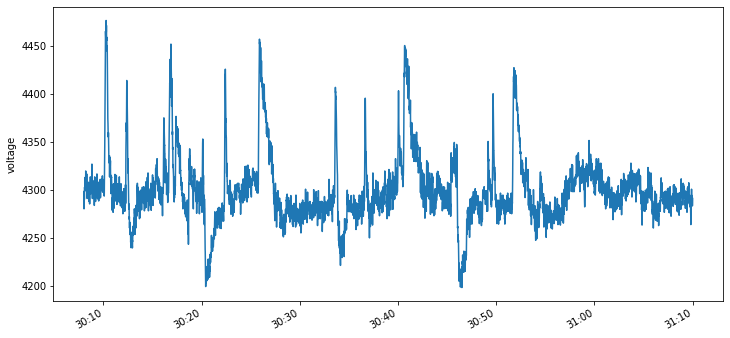

In [ ]:
#show the eeg data from channel v1
date_formatter = DateFormatter( "%M:%S" )  #just show minutes:seconds
ax = v1[slicing].plot(figsize=( 12 , 6 ))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel( 'voltage' );

In [ ]:
#make a dataframe from the slice
df = v1[slicing].to_frame(name="eeg")
#df.plot(figsize=(12,8))

##Your first timeseries predictor

In [ ]:
#will attempt to predict the last test_size elements in the series
test_size = 18
test_ind = len(df)-test_size  #index of the first element to predict -1
train=df.iloc[:test_ind]  #train on everything before that
test=df.iloc[test_ind:]   #test on everything after that

In [ ]:
#scale the range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)  #scale the test set using the training set scaler 
                                      #(because we don't know the test set beforehand)
                                      #NOTE: scaler.transform() returns a numpy array, even for dataframe input

When we use multiple past samples to predict a future sample, the training samples are vectors of overlapping past samples.  For example, the first example has $X(0) = (x(-N) \ldots x(-1))$ as input, to predict output $Y(0) = x(0)$.  The second has $X(1) =  (x(1-N) \ldots x(0))$ as input, to predict output $Y(1) = x(1)$, and so on.  TimeSeriesGenerator creates this set of examples (X(t), Y(t)) from the original input timeseries, where $X(t) = (x(t-N)\ldots x(t-1))$, and $Y(t) = x(t)$.

In [61]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
predict_length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = predict_length, batch_size=1)
#X,y = generator[t] produces an array {[X(t-N)...X(t-1)], [X(t)]}

##Create the network model using tensorflow and Keras
There are many possible models.  Some will work much better than others.  For now we are going to pick one at random (and it will not work very well).  This is network with two trainable layers and a single layer of long-short-term memory (LSTM) hidden units, and a linear output unit. We will discuss LSTM and other recursive models later.

The Adam optimizer is a stochastic gradient descent method that sets learning rates for parameters based on the history of the gradient and the variance in the gradient for each parameter.
\begin{equation}
\Delta w = -\gamma E[\nabla f(w)] \cdot E[(\nabla f(w))^2]^{-1/2}
\end{equation}
where $\nabla f(w)$ is the gradient of the output of the network with respect to the weights $w$, and the expectations $E[]$ are decaying averages of recent values of the gradient and squared gradient.
("Adam: A Method for Stochastic Optimization", 
Diederik P. Kingma and Jimmy Ba,
2017)

The mean-squared error (mse) loss function applies to things that look like regressions, where one continuous variable depends on other continuous variables.  It is very susceptible to bias from outliers and tends to have slow learning when errors are small.

In [92]:
from tensorflow.tools.docs.doc_controls import do_not_doc_inheritable
from matplotlib import use
from tensorflow.python.keras.engine.base_layer_utils import uses_keras_history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import LSTM
n_features = 1
model = Sequential()
use_lstm = 0
if use_lstm == 1:
  model.add(LSTM(20, activation='relu', input_shape=(predict_length, n_features)))
  #lstm expects the data generator to supply samples in time sequence
else:
  #if you don't flatten, will get a separate single-input net for each time value
  #don't need to do this for LSTM layers; they flatten implicitly
  model.add(Flatten(input_shape = (predict_length, n_features)))
  model.add(Dense(20, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 12)                0         
                                                                 
 dense_29 (Dense)            (None, 20)                260       
                                                                 
 dense_30 (Dense)            (None, 1)                 21        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


Early stopping criteria will save you a lot of time.  It basically stops the network when the error on the validation (test) set is no longer decreasing.  The "patience" parameter says how many times you make sure it is nondecreasing before you stop.  Patience > 2 is a good idea.

In this case, the test set is small (just the last 18 points in the series) so this is not a particularly good validation.  In fact, one could argue that the early stopping criteria risks overfitting the test set.  To be completely honest with this sort of thing, the early-stopping criterion should not depend on the test set, but should depend on a different "validation set".  Remember that in a real prediction situation, you do not know the test set in advance, and thus could not use it for early stopping or anything else.

Earlystopping will be set to monitor the validation-set loss (mse) using the internal variable 'val_loss'.  This is the default.

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=predict_length, batch_size=1)

Here is where all the work happens.  Before you do this, go to the menus at the top of your Jupyter notebook and select Edit/NotebookSettings and choose either a graphics processing unit (GPU) or tensor processing unit (TPU).  Then in the upper right, click on connect to have google load an appropriate hardware platform for you.  If you don't do this, it will still run but much slower.  This is probably also faster than most desktop machines available to you, although if you have something with a cuda-enabled gpu or two, then you might be able to keep up.  Note that Mac computers do not use cuda-compatible gpu's, so you are out of luck with hardware acceleration under tensorflow2/python3 on your local mac computer.

##To ensure that your homework outputs are your own, please set the random seed for your simulations to be your UCI ID number (or some other number unique to you).

In [153]:
#for all homework, please set the seeds of your random number generators to your UCI ID number
np.random.seed(10327798)
tf.random.set_seed(10327798)

model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
7907/7907 [==============================] - 17s 2ms/step - loss: 0.0012 - val_loss: 1.4820e-04
Epoch 2/20
7907/7907 [==============================] - 15s 2ms/step - loss: 5.1134e-04 - val_loss: 3.0360e-04
Epoch 3/20
7907/7907 [==============================] - 15s 2ms/step - loss: 4.4360e-04 - val_loss: 1.3223e-04
Epoch 4/20
7907/7907 [==============================] - 15s 2ms/step - loss: 4.3108e-04 - val_loss: 5.3717e-04
Epoch 5/20
7907/7907 [==============================] - 16s 2ms/step - loss: 4.1470e-04 - val_loss: 1.4737e-04


The history stores the timeseries of the loss (mse on the training set) and val_loss (mse on the validation set)

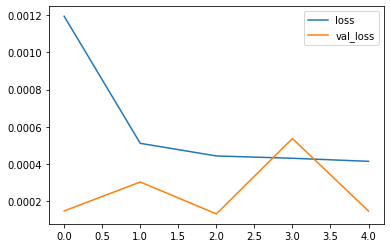

In [154]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Compare the one-step-ahead predictions to the true data.  This is not really a fair measure of the quality of the network prediction.  A "copylast" operation will usually do pretty well at this task, for any even partly smooth function.

It's always good to do this to make sure things are not far off.  You can also look for patterns of errors, for instance at peaks or areas of rapid change in the function.

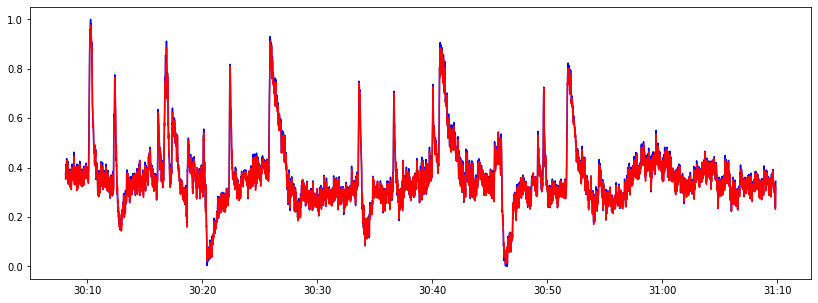

In [155]:
#get the model predictions for all timepoints
predicted_outputs = model.predict(generator)
#convert to dataframes with the correct timestamps.  outputs start at t=predict_length
train_predict = pd.DataFrame(data=predicted_outputs, columns=['eeg'], index=train.index[predict_length:])
train_orig = pd.DataFrame(data=scaled_train[predict_length:], columns=['eeg'], index=train.index[predict_length:len(scaled_train)])
plt.figure(figsize=(14,5),linewidth=1)
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_formatter)
plt.plot(train_orig,'b')
plt.plot(train_predict,'r')
plt.show()

A network predictor is not (usually) a linear function and so the concept of an impulse response does not make as much sense.  For instance, any time-invariant linear filter can be written as $y(t) = \int h(\tau) x(t-\tau) d\tau$ where $h(t)$ is called the impulse response because $h(t) = \int h(\tau) \delta(t-\tau) d\tau = h(t)$ is the response to delta-function input.   

So in a linear filter with impulse response  $h(t)$,  for any input $x(t)$ you can predict the output from the convolution of $h$ with the input $x$ using $y(t) = \int h(\tau) x(t-\tau) d\tau$.  This is true because you can think of $h$ as a linear superposition of time-lagged delta functions $h(t) = \sum_i h(t_i)\delta(t-t_i)$, or in the limit 
\begin{equation}
h(t) = \int h(\tau) \delta(t-\tau) d\tau
\end{equation}
\begin{equation}
y=h*x = \int h(\tau) \delta(\eta - \tau) x(t-\eta) d\tau d\eta  
\end{equation}
\begin{equation}
y(t) = \int h(\tau) x(t-\tau) d\tau  
\end{equation}
This is not true for a nonlinear network, and $H[x(t)]$ is probably not a superposition of delta functions, or anything else that you recognize.

But we can still calculate the impulse response, while being aware that it is NOT TRUE that the output of the filter is the convolution of the impulse response with the input:  $y(t) \neq h(t) * x(t)$.

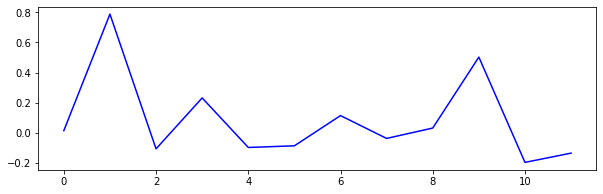

In [156]:
impulse = np.zeros(2*predict_length)
impulse[predict_length]=1
impulse_generator = TimeseriesGenerator(impulse,impulse, length = predict_length, batch_size=1)
impulse_response = model.predict(impulse_generator)
plt.figure(figsize=(10,3),linewidth=1)
plt.plot(impulse_response,'b')
plt.show()

Here we look at the iterated predictions.  This means using $x(t-N) \ldots x(t-1)$ to predict $\hat{x}(t)$, then using $\hat{x}(t)$ to predict $\hat{x}(t+1)$, and so on.  Each time, we can compare to how well we would have done with full knowledge up to that time.

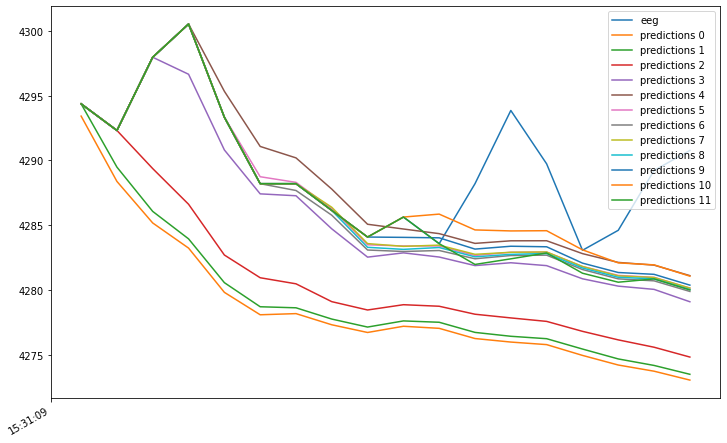

In [157]:
 test_predict = test.copy()
 for t0 in range(predict_length):
  test_predictions = []

  if t0>0:
    first_eval_batch = np.append(scaled_train[-(predict_length-t0):],scaled_test[:t0])
  else:
    first_eval_batch = scaled_train[-predict_length:]
  current_batch = first_eval_batch.reshape((1, predict_length, n_features))

  for i in range(len(test)-t0):
      
      # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
      current_pred = model.predict(current_batch)[0]
      
      # store prediction
      test_predictions.append(current_pred) 
      
      # update batch to now include prediction and drop first value
      current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  if t0>0:
    test_predictions = np.append(scaled_test[:t0], test_predictions, axis=0)
  scaled_predictions = scaler.inverse_transform(test_predictions)
  test_predict[f'predictions {t0}']= scaled_predictions
test_predict.plot(figsize=(12,8))

#Homework 1
Repeat the above analysis for the following cases:
1. a "Dense" network layer with 100 hidden nodes
2. an LSTM network layer  with 20 hidden nodes
3. an LSTM network layer with 100 hidden nodes
4. A Dense network layer with 100 hidden nodes and using a time buffer of predict_length = 24 timepoints.

What conclusions can you draw from looking at the results?

Please submit your output in two forms:  (1) the original ipynb jupyter notebook, and (2) a pdf printout of the notebook with all the calculated results.  Remember to insert a unique id value (perhaps your UCI id number) as the random seed for the learning algorithm.  

Upload your homework to canvas prior to next Monday's class.